In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 20

## Deflategate ##

In [2]:
football = Table.read_table('deflategate.csv')
football.show()

Team,Blakeman,Prioleau
Patriots,11.5,11.8
Patriots,10.85,11.2
Patriots,11.15,11.5
Patriots,10.7,11
Patriots,11.1,11.45
Patriots,11.6,11.95
Patriots,11.85,12.3
Patriots,11.1,11.55
Patriots,10.95,11.35
Patriots,10.5,10.9


In [3]:
combined = (football.column('Blakeman')+football.column('Prioleau'))/2
football = football.drop('Blakeman', 'Prioleau').with_column(
    'Combined', 
    combined)
football.show()

Team,Combined
Patriots,11.65
Patriots,11.025
Patriots,11.325
Patriots,10.85
Patriots,11.275
Patriots,11.775
Patriots,12.075
Patriots,11.325
Patriots,11.15
Patriots,10.7


In [4]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [5]:
initial_pressure = np.append(12.5 * np.ones(11), 13 * np.ones(4))
initial_pressure

array([12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5,
       13. , 13. , 13. , 13. ])

In [6]:
drop_values = initial_pressure - football.column(1)

In [7]:
football = football.drop('Combined').with_column('Drop', drop_values)

In [8]:
football.show()

Team,Drop
Patriots,0.85
Patriots,1.475
Patriots,1.175
Patriots,1.65
Patriots,1.225
Patriots,0.725
Patriots,0.425
Patriots,1.175
Patriots,1.35
Patriots,1.8


In [9]:
means = football.group('Team', np.average)
means

Team,Drop average
Colts,0.46875
Patriots,1.20227


In [10]:
observed_difference = means.column(1).item(0) - means.column(1).item(1)
observed_difference

-0.733522727272728

In [11]:
def diff_between_means(tbl):
    means = tbl.group('Team', np.average).column(1)
    return means.item(0) - means.item(1)

In [12]:
drops = football.select('Drop')

In [13]:
shuffled_drops = drops.sample(with_replacement = False).column(0)
shuffled_drops

array([0.475, 1.375, 1.175, 1.475, 0.425, 0.65 , 0.475, 1.175, 1.225,
       1.65 , 0.85 , 1.35 , 0.725, 1.8  , 0.275])

In [14]:
simulated_football = football.with_column('Drop', shuffled_drops)
simulated_football.show(3)

Team,Drop
Patriots,0.475
Patriots,1.375
Patriots,1.175


In [15]:
diff_between_means(simulated_football)

0.04204545454545505

In [16]:
differences = make_array()

for i in np.arange(5000):
    shuffled_drops = drops.sample(with_replacement = False).column(0)
    simulated_football = football.with_column('Drop', shuffled_drops)
    new_diff = diff_between_means(simulated_football)
    differences = np.append(differences, new_diff)

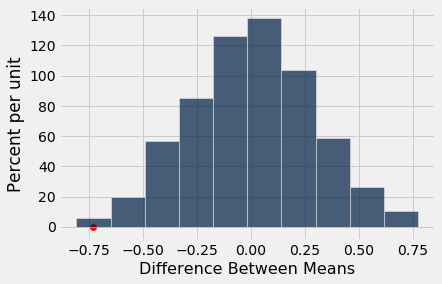

In [17]:
Table().with_column('Difference Between Means', differences).hist()
plots.scatter(observed_difference, 0, color='red', s=40);

In [18]:
np.average(differences <= observed_difference)

0.0022

## Analyzing RCTs ##

In [19]:
# Botulinum Toxin A (bta) as a treatment to chronic back pain
# 15 in the treatment group
# 16 in the control group (normal saline)
# trials were run double-blind (neither doctors nor patients knew which group they were in)
# Result = 1 indicates pain relief
bta = Table.read_table('bta.csv')
bta.show()

Group,Result
Control,1
Control,1
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0


In [20]:
bta.group('Group', sum)

Group,Result sum
Control,2
Treatment,9


In [21]:
bta.group('Group', np.average)

Group,Result average
Control,0.125
Treatment,0.6


In [22]:
observed_outcomes = Table.read_table('observed_outcomes.csv')
observed_outcomes.show()

Group,Outcome if assigned treatment,Outcome if assigned control
Control,Unknown,1
Control,Unknown,1
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0


In [23]:
bta.group('Group', np.average).column(1)

array([0.125, 0.6  ])

In [24]:
abs(0.125 - 0.6)

0.475

In [25]:
def distance_between_group_proportions(tbl):
    proportions = tbl.group('Group', np.average).column(1)
    return abs(proportions.item(1) - proportions.item(0))

In [26]:
observed_distance = distance_between_group_proportions(bta)
observed_distance

0.475

In [27]:
labels = bta.select('Group')
results = bta.select('Result')

In [28]:
# Repeat
distances = make_array()
for i in np.arange(2000):
    shuffled_results = results.sample(with_replacement=False).column(0)
    simulated = labels.with_column('Shuffled results', shuffled_results)
    distance = distance_between_group_proportions(simulated)
    distances = np.append(distances, distance)

distances

array([0.04166667, 0.04166667, 0.21666667, ..., 0.21666667, 0.04166667,
       0.21666667])

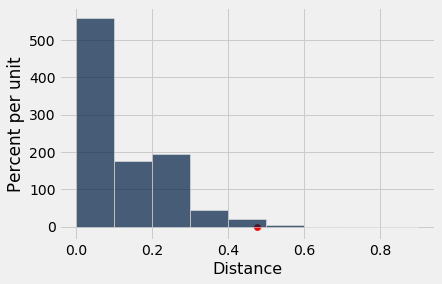

In [29]:
Table().with_column('Distance', distances).hist(bins = np.arange(0, 1, 0.1))
plots.scatter(observed_distance, 0, color='red', s=40);

In [30]:
np.average(distances >= observed_distance)

0.012